In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
def buildAndTrainTheModel(x,y):

  ANNreg = nn.Sequential(
      nn.Linear(1,1),  
      nn.ReLU(),       
      nn.Linear(1,1)   
      )
  
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)

  # training model
  numepochs = 500
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    yHat = ANNreg(x)
    
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = ANNreg(x)
  return predictions, losses

In [4]:
def createTheData(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y

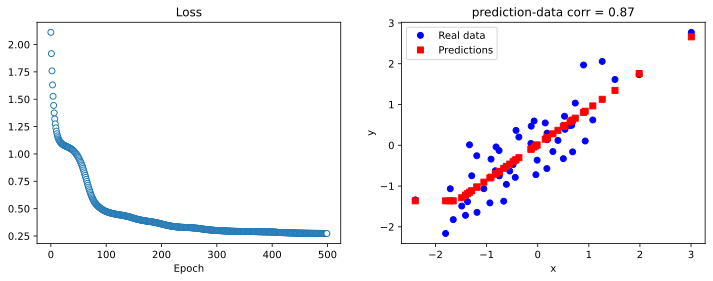

In [5]:
x,y = createTheData(.8)

yHat,losses = buildAndTrainTheModel(x,y)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [6]:
slopes = np.linspace(-2,2,21)
numExps = 50
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):
    x,y = createTheData(slopes[slopei])
    yHat,losses = buildAndTrainTheModel(x,y)
    yHat = yHat.detach()
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,yHat.T)[0,1]
    
results[np.isnan(results)] = 0

c:\Users\Dharaneesh.V\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Dharaneesh.V\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


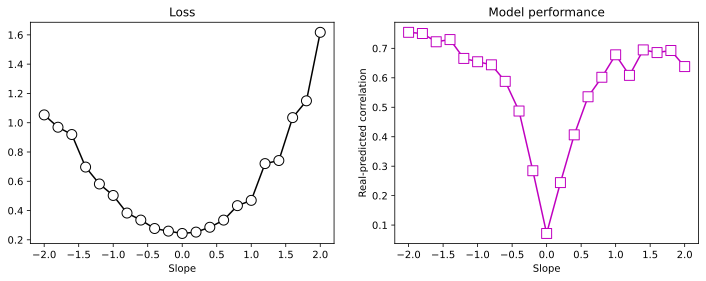

In [8]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

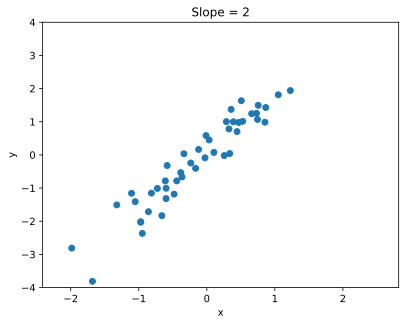

In [9]:
# extra code to visualize data with different slopes

m = 2

x,y = createTheData(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()